In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set paths
train_path = '/home/data/train'
test_path = '/home/data/test'

print("Exploring Dogs vs Cats dataset...")
print(f"Train path: {train_path}")
print(f"Test path: {test_path}")

Exploring Dogs vs Cats dataset...
Train path: /home/data/train
Test path: /home/data/test


In [2]:
# Get list of training images
train_files = os.listdir(train_path)
print(f"Total training images: {len(train_files)}")

# Separate cats and dogs
cat_files = [f for f in train_files if f.startswith('cat')]
dog_files = [f for f in train_files if f.startswith('dog')]

print(f"Cat images: {len(cat_files)}")
print(f"Dog images: {len(dog_files)}")
print(f"Class balance: {len(cat_files)/(len(cat_files)+len(dog_files)):.2%} cats, {len(dog_files)/(len(cat_files)+len(dog_files)):.2%} dogs")

Total training images: 22500
Cat images: 11242
Dog images: 11258
Class balance: 49.96% cats, 50.04% dogs


Image Characteristics (sample of 100):
Width - Mean: 412.5, Std: 105.3, Min: 90, Max: 500
Height - Mean: 354.3, Std: 84.5, Min: 99, Max: 500
Aspect Ratio - Mean: 1.19, Std: 0.28
Unique formats: {'JPEG'}


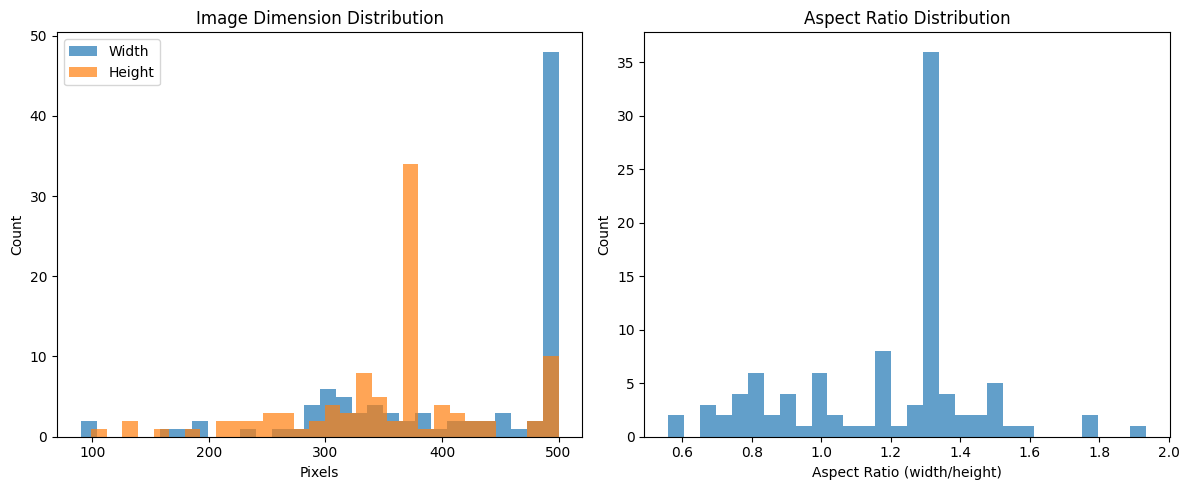

In [3]:
# Explore image characteristics
sample_images = train_files[:100]  # Sample first 100 images

image_sizes = []
aspect_ratios = []
formats = []

for img_file in sample_images:
    try:
        img_path = os.path.join(train_path, img_file)
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes.append((width, height))
            aspect_ratios.append(width/height)
            formats.append(img.format)
    except Exception as e:
        print(f"Error reading {img_file}: {e}")

# Summary statistics
widths = [s[0] for s in image_sizes]
heights = [s[1] for s in image_sizes]

print("Image Characteristics (sample of 100):")
print(f"Width - Mean: {np.mean(widths):.1f}, Std: {np.std(widths):.1f}, Min: {min(widths)}, Max: {max(widths)}")
print(f"Height - Mean: {np.mean(heights):.1f}, Std: {np.std(heights):.1f}, Min: {min(heights)}, Max: {max(heights)}")
print(f"Aspect Ratio - Mean: {np.mean(aspect_ratios):.2f}, Std: {np.std(aspect_ratios):.2f}")
print(f"Unique formats: {set(formats)}")

# Plot size distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.title('Image Dimension Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(aspect_ratios, bins=30, alpha=0.7)
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Count')
plt.title('Aspect Ratio Distribution')
plt.tight_layout()
plt.show()